In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../Data/epsPQRS.csv', sep=';')
data

,Comentario,Area
0,pqrd-18-0674823nurc 1-2018-221502entidad: capi...,Negación De Servicios
1,pqrd-18-0675272nurc 1-2018-216612entidad: capi...,Negación De Servicios
2,pqrd-18-0675410nurc 1-2018-221583entidad: capi...,Dificultad Accesibilidad Administrativa
3,pqrd-18-0675530nurc 1-2018-217812entidad: capi...,Negación De Servicios
4,favor enviar copia al ministerio de salud y pr...,Dificultad Tutelas
...,...,...
77821,ss vacunas antigeno del virus de hepatitis b 2...,No Suministro Medicamentos
77822,apixaban 5 mg tableta,Caso Ya Registrado
77823,ss solucion mipres 20201123175024488426,Negación De ServiciosDificultad MédicoAdmin
77824,ss implante de dispositivo en cornea asistido,Negación De ServiciosDificultad MédicoAdmin


In [3]:
data = data.sample(frac=0.85)

In [4]:
data.Area.value_counts(normalize=True)

Oportunidad Citas Red Contratada                  0.452957
No Suministro Medicamentos                        0.184076
Dificultad Accesibilidad Administrativa           0.120737
Inconsistencias Sistemas De InformacionAsegura    0.073482
Negación De ServiciosDificultad MédicoAdmin       0.055478
Dificultad Tutelas                                0.029115
Negación De Servicios                             0.027437
Incumplimiento Portabilidad Nacional              0.010385
Problemas Recursos Economicos                     0.005759
Atención Deshumanizada                            0.005472
Tramite Interno I                                 0.005140
Dificultad Alto Costo                             0.005019
Cotizaciones Pau Rs                               0.004822
Exclusiones Usuarios Sin Tutela                   0.004777
Prestaciones Economicas                           0.004656
Duplicados                                        0.001602
Regimen Contributivo                              0.0016

In [183]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.2, random_state=0)

In [184]:
print(f'Tenemos {data.shape[0]} datos en total.')
print(f'El conjunto de entrenamiento (train) tiene {train.shape[0]} datos.')
print(f'El conjunto de prueba (test) tiene {test.shape[0]} datos.')

Tenemos 63242 datos en total.
El conjunto de entrenamiento (train) tiene 50593 datos.
El conjunto de prueba (test) tiene 12649 datos.


In [185]:
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopwords_sp = stopwords.words('spanish')

In [186]:
def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d_]+", " ", texto)
    texto = texto.split() # Tokenizar
    texto = [palabra for palabra in texto if palabra not in stopwords_sp]
    texto = " ".join(texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)

In [187]:
X_train = tfidf_vect.fit_transform(train.Comentario.values)
y_train = train.Area.values

In [188]:
X_test = tfidf_vect.transform(test.Comentario.values)
y_test = test.Area.values

In [189]:
print(f"Tamaño de X_train (entrenamiento): {pd.DataFrame(X_train.toarray()).shape}")
print(f"Tamaño de X_test (prueba): {pd.DataFrame(X_test.toarray()).shape}")
print(f"Tamaño de y_train {len(y_train)} y tamaño de y_test {len(y_test)}")

Tamaño de X_train (entrenamiento): (50593, 51203)
Tamaño de X_test (prueba): (12649, 51203)
Tamaño de y_train 50593 y tamaño de y_test 12649


In [190]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [191]:
# Inicializar los clasificadores
nb = MultinomialNB()
logreg = LogisticRegression(class_weight='balanced') #  solver='lbfgs', max_iter=10, random_state=42
svm = LinearSVC(class_weight='balanced')
dt = DecisionTreeClassifier(class_weight='balanced')

In [192]:
# Entrenamos los modelos
nb.fit(X_train, y_train)
logreg.fit(X_train, y_train)
svm.fit(X_train, y_train)
dt.fit(X_train, y_train);

C:\Users\jrm20\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jrm20\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [193]:
y_pred_nb = nb.predict(X_test)
y_pred_logreg = logreg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_dt = dt.predict(X_test)

In [194]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [195]:
# Exactitud
print( f'Naive Bayes: {accuracy_score(y_test, y_pred_nb):>15.2f}')
print( f'Regresión Logística: {accuracy_score(y_test, y_pred_logreg):>7.2f}')
print( f'SVM: {accuracy_score(y_test, y_pred_svm):>23.2f}')
print( f'Árbol de decisión: {accuracy_score(y_test, y_pred_dt):>9.2f}')

Naive Bayes:            0.62
Regresión Logística:    0.62
SVM:                    0.69
Árbol de decisión:      0.58


In [196]:
print('Naive Bayes')
print(classification_report(y_test, y_pred_nb, zero_division=1))
print()

Naive Bayes
                                                precision    recall  f1-score   support

                                Administrativa       1.00      0.00      0.00         1
                                Apoyo Juridico       1.00      0.00      0.00         3
                        Atención Deshumanizada       1.00      0.00      0.00        75
                           Cotizaciones Pau Rc       1.00      0.00      0.00         2
                           Cotizaciones Pau Rs       1.00      0.00      0.00        49
                               Cotizaciones Rc       1.00      0.00      0.00         1
                               Cotizaciones Rs       1.00      0.00      0.00        20
                       Cotizaciones Tutelas Rs       1.00      0.00      0.00         2
                                           Ctc       1.00      0.00      0.00         1
       Dificultad Accesibilidad Administrativa       0.63      0.33      0.43      1654
                   

In [143]:
print('Regresion Logistica')
print(classification_report(y_test, y_pred_logreg, zero_division=1))
print()

Regresion Logistica
                                                precision    recall  f1-score   support

                                Administrativa       0.00      0.00      0.00         4
                      Afiliaciones Y Novedades       1.00      0.00      0.00         1
                                Apoyo Juridico       0.00      0.00      0.00         2
                        Atención Deshumanizada       0.20      0.63      0.31        73
                            Caso Ya Registrado       0.00      0.00      0.00        23
                               Correspondencia       1.00      0.00      0.00         1
                           Cotizaciones Pau Rc       0.00      0.00      0.00         5
                           Cotizaciones Pau Rs       0.06      0.35      0.11        68
                               Cotizaciones Rc       0.00      0.00      0.00         2
                               Cotizaciones Rs       0.00      0.00      0.00        20
           

In [197]:
print('SVM')
print(classification_report(y_test, y_pred_svm,zero_division=1))
print()

SVM
                                                precision    recall  f1-score   support

                                Administrativa       0.00      0.00      0.00         1
                      Afiliaciones Y Novedades       0.00      1.00      0.00         0
                                Apoyo Juridico       0.00      0.00      0.00         3
                        Atención Deshumanizada       0.31      0.55      0.39        75
                           Cotizaciones Pau Rc       0.00      0.00      0.00         2
                           Cotizaciones Pau Rs       0.09      0.27      0.13        49
                               Cotizaciones Rc       0.00      0.00      0.00         1
                               Cotizaciones Rs       0.03      0.05      0.04        20
                       Cotizaciones Tutelas Rs       1.00      0.50      0.67         2
                                           Ctc       0.00      0.00      0.00         1
       Dificultad Accesibil

In [198]:
print('Árbol de decisión')
print(classification_report(y_test, y_pred_dt, zero_division=1))
print()

Árbol de decisión
                                                precision    recall  f1-score   support

                                Administrativa       0.00      0.00      0.00         1
                                Apoyo Juridico       0.00      0.00      0.00         3
                        Atención Deshumanizada       0.16      0.31      0.21        75
                           Cotizaciones Pau Rc       0.00      0.00      0.00         2
                           Cotizaciones Pau Rs       0.01      0.02      0.01        49
                               Cotizaciones Rc       0.00      0.00      0.00         1
                               Cotizaciones Rs       0.05      0.05      0.05        20
                       Cotizaciones Tutelas Rs       0.33      0.50      0.40         2
                                           Ctc       0.00      0.00      0.00         1
       Dificultad Accesibilidad Administrativa       0.45      0.39      0.42      1654
             

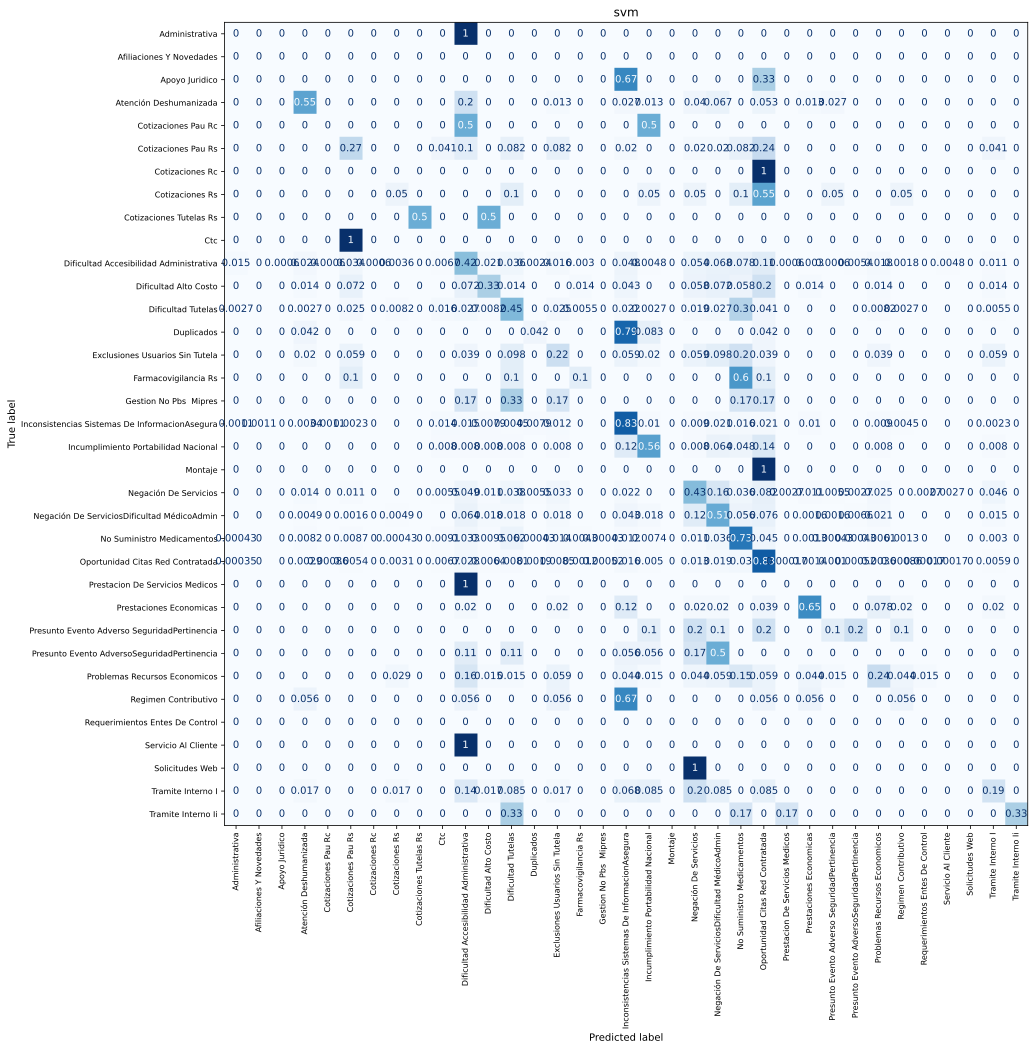

In [199]:
%config InlineBackend.figure_format = 'svg'

fig, ax = plt.subplots(figsize = (18, 18))

plot_confusion_matrix(svm, X_test, y_test, cmap="Blues", ax=ax, normalize='true').im_.colorbar.remove()
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("svm")
plt.show()

In [200]:
# Resultados
nuevos = ['diagnóstico posible derrame interno se encuentra hospitalizado en la ips hospital de san',
          'Tengo mucho dolor de cabeza y necesito atencion', 
          'Estoy solicitando una cita desde hace mucho tiempo']
nuevos_trans = tfidf_vect.transform(nuevos)

In [201]:
print(nb.predict(nuevos_trans))

['Oportunidad Citas Red Contratada' 'Oportunidad Citas Red Contratada'
 'Oportunidad Citas Red Contratada']


In [202]:
print(logreg.predict(nuevos_trans))

['Negación De Servicios' 'Dificultad Accesibilidad Administrativa'
 'Oportunidad Citas Red Contratada']


In [203]:
print(svm.predict(nuevos_trans))

['Negación De Servicios' 'Oportunidad Citas Red Contratada'
 'Oportunidad Citas Red Contratada']


In [204]:
print(dt.predict(nuevos_trans))

['Negación De Servicios' 'Oportunidad Citas Red Contratada'
 'Oportunidad Citas Red Contratada']
